In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
# wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
# wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
# !tar xf VOCtrainval_11-May-2012.tar
# # tar xf VOCtrainval_06-Nov-2007.tar
# # tar xf VOCtest_06-Nov-2007.tar
# !wget https://pjreddie.com/media/files/voc_label.py
# !python voc_label.py

In [0]:
# !ls -la /content/gdrive/My\ Drive/darknet/ol
!ls -la /content

total 20
drwxr-xr-x 1 root root 4096 Aug 15 12:09 .
drwxr-xr-x 1 root root 4096 Aug 15 11:50 ..
drwxr-xr-x 1 root root 4096 Aug 13 16:04 .config
drwx------ 3 root root 4096 Aug 15 12:09 gdrive
drwxr-xr-x 1 root root 4096 Aug  2 16:06 sample_data


In [0]:
# . Calculate anchors for your case
!/content/darknet detector calc_anchors "/content/gdrive/My Drive/darknet/obj.data" -num_of_clusters 9 -width 416 -height 416


 num_of_clusters = 9, width = 416, height = 416 
 read labels from 5271 images 
 loaded 	 image: 2970 	 box: 2970
 all loaded. 

 calculating k-means++ ...

 iterations = 30 


 avg IoU = 94.45 % 

Saving anchors to the file: anchors.txt 
anchors =  88, 36,  97, 36,  90, 40,  60, 63,  90, 43,  98, 43,  94, 47, 108, 50, 125, 63
/content/gdrive/My\ Drive/darknet


In [0]:
# # # clone darknet from https://github.com/kriyeng/darknet into darknet-master-2
# # #compile darknet from directory darknet-master-2
# %cd "/content/gdrive/My Drive/darknet/darknet-master/darknet"
%cd "/content/gdrive/My Drive/darknet/darknet-master-2"

# #Compile Darknet
!make

/content/gdrive/My Drive/darknet/darknet-master-2
Scanning dependencies of target darknet
[ -2%] Building CXX object CMakeFiles/darknet.dir/src/detector.c.o
/content/gdrive/My Drive/darknet/darknet-master-2/src/detector.c: In function ‘void test_detector(char*, char*, char*, char*, float, float, int, int, int, char*)’:
/content/gdrive/My Drive/darknet/darknet-master-2/src/detector.c:1307:28: warning: unknown escape sequence: '\040'
             show_image(im, "/content/gdrive/My\ Drive/darknet/prediction.jpg");
                            ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[ -1%] Linking CUDA device code CMakeFiles/darknet.dir/cmake_device_link.o
[ -1%] Linking CXX executable darknet
[ 47%] Built target darknet
Scanning dependencies of target darklib
[ 48%] Building CXX object CMakeFiles/darklib.dir/src/detector.c.o
/content/gdrive/My Drive/darknet/darknet-master-2/src/detector.c: In function ‘void test_detector(char*, char*, char*, char*, float, float, int, int, int, c

In [0]:
#0. #execute ./darknet
!cp '/content/gdrive/My Drive/darknet/darknet-master-2/darknet' /content
!chmod +x /content/darknet

In [0]:
#1. train.txt
!cp /content/gdrive/My\ Drive/darknet/train.txt /content
!chmod -rwx /content/train.txt 

In [0]:
#2. test.txt
!cp /content/gdrive/My\ Drive/darknet/test.txt /content
!chmod -rwx /content/test.txt

In [0]:

#3. obj.names
!cp /content/gdrive/My\ Drive/darknet/obj.names /content
!chmod -rwx /content/obj.names

In [0]:
#4. backup
!mkdir /content/backup/
!chmod -R -rwx /content/backup

In [0]:
#5. yolo_obj.cfg
!cp /content/gdrive/My\ Drive/darknet/yolo_obj.cfg /content/
!chmod -rwx /content/yolo_obj.cfg

In [0]:
#8. obj.data
!cp "/content/gdrive/My Drive/darknet/obj.data" /content
!chmod -rwx "/content/obj.data"

In [0]:
#6. directory img which contains all test data
!mkdir /content/imgTest/
!chmod -R -rwx /content/imgTest/

In [0]:
!cp -a /content/gdrive/My\ Drive/darknet/imgTest /content
!chmod -R -rwx /content/imgTest/

In [0]:
#6. directory img which contains all training data
!mkdir /content/img/
!chmod -R -rwx /content/img/


mkdir: cannot create directory ‘/content/img/’: File exists


In [0]:
!cp -a /content/gdrive/My\ Drive/darknet/img /content
!chmod -R -rwx /content/img/

In [0]:
%cd "/content/imgTest"
!ls -1 | wc -l 
%cd "/content/img"
!ls -1 | wc -l 

[Errno 2] No such file or directory: '/content/imgTest'
/content
4
/content/img
10479


In [0]:
#9. #train from scratch
!/content/darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup2/backup/yolo_obj_6000.weights" -dont_show -map |tee -a /content/gdrive/My\ Drive/darknet/log.txt

backup: Using default '/content/gdrive/My Drive/darknet/backup2/backup/'
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv  

In [0]:
#10. back to My Drive/backup/
# !cp -a /content/backup /content/gdrive/My\ Drive/darknet/backup2

In [0]:
#11. calculate mAP in test set
# !/content/darknet detector map  "/content/obj.data" "/content/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup2/backup/yolo_obj_400.weights" | tee -a /content/gdrive/My\ Drive/darknet/mapFile.txt
# # !/content/darknet detector map  "/content/obj.data" "/content/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup2/backup/yolo_obj_500.weights" | tee -a /content/gdrive/My\ Drive/darknet/mapFile.txt
!/content/darknet detector map  "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup2/backup/yolo_obj_4500.weights" | tee -a /content/gdrive/My\ Drive/darknet/mapFile.txt
!/content/darknet detector map  "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup2/backup/yolo_obj_5000.weights" | tee -a /content/gdrive/My\ Drive/darknet/mapFile.txt
!/content/darknet detector map  "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup2/backup/yolo_obj_5500.weights" | tee -a /content/gdrive/My\ Drive/darknet/mapFile.txt
!/content/darknet detector map  "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup2/backup/yolo_obj_6000.weights" | tee -a /content/gdrive/My\ Drive/darknet/mapFile.txt


In [13]:
# #12. test on img 
# !chmod -rwx /content/gdrive/My\ Drive/darknet/bin/darknet
!/content/darknet detector test  "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup2/backup/yolo_obj_4000.weights" -dont_show "/content/gdrive/My Drive/darknet/img/6612199_LpnImg_220190717000455.jpg" -thresh 0.5 -ext_output 1

Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image data/labels/55_0.png
Cannot load image data/labels/56_0.png
Cannot load image data/la

In [0]:
# #5. yolo_obj.cfg
# !cp /content/gdrive/My\ Drive/darknet/yolo_obj.cfg /content/
# !chmod -rwx /content/yolo_obj.cfg

# #12. train from last weight
# #!/content/darknet detector train "/content/obj.data" "/content/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup/yolov3.conv.81" 
#!/content/darknet detector train "/content/obj.data" "/content/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup/yolo_obj_last.weights" |

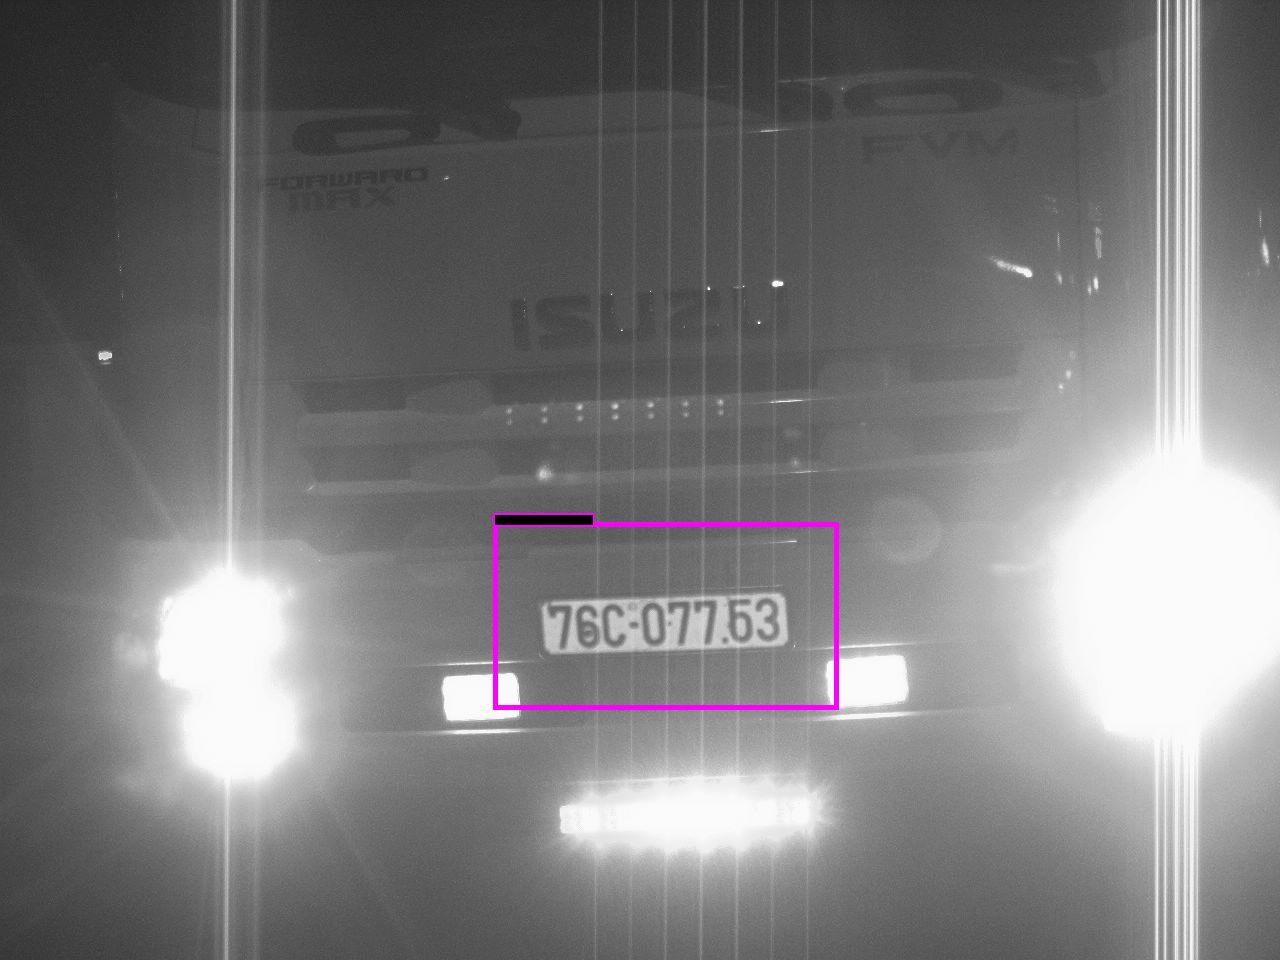

In [12]:
# # #13. #show test image after detecting
import cv2
from google.colab.patches import cv2_imshow
#img=cv2.imread("/content/img/000000262631.jpg")
img = cv2.imread("/content/gdrive/My Drive/darknet/prediction.jpg.jpg")
cv2_imshow(img)

In [0]:
!python /content/gdrive/My\ Drive/parse_log_file.py

In [0]:
import os
import cv2
from google.colab.patches import cv2_imshow
inputFolder = os.path.abspath("/content/gdrive/My Drive/darknet/imgTest/")
for file in os.listdir(inputFolder):
  if ".jpg" in file:
    imgPath = os.path.join(inputFolder, file)
    print(imgPath)
    !/content/darknet detector test  "/content/obj.data" "/content/yolo_obj.cfg" "/content/gdrive/My Drive/darknet/backup2/backup/yolo_obj_1400.weights" -dont_show imgPath -thresh 0.5
    img = cv2.imread("/content/gdrive/My Drive/darknet/darknet-master-2/predictions.jpg")
    cv2_imshow(img)
    cv2.waitKey(1)
    cv2.destroyAllWindows()

In [0]:
# !ls -la /content/gdrive/My\ Drive/darknet/backup

In [0]:
# # %cd "/content/gdrive/My Drive/darknet/Yolo_mark/" 
# # !cmake .
# # !make
# # !chmod +x /content/gdrive/My\ Drive/darknet/Yolo_mark/linux_mark.sh 
# # !/content/gdrive/My\ Drive/darknet/Yolo_mark/linux_mark.sh
# !chmod +x "/content/gdrive/My Drive/darknet/Yolo_mark/yolo_mark" 
# # !cp "/content/gdrive/My Drive/darknet/Yolo_mark/yolo_mark" /content
# # !chmod +x /content/yolo_mark
# !"/content/gdrive/My Drive/darknet/Yolo_mark/yolo_mark"  /content/img /content/train.txt /content/obj.names

In [0]:
# !ls -la /content/gdrive/My\ Drive/darknet/Yolo_mark

In [0]:
# !rm /content/backup/yolo_obj_2.weights

In [0]:
# !mv /content/backup/yolo_obj_303.weights /content/gdrive/My\ Drive/darknet/yolo_obj_303.weights

In [0]:
# !ls -la /content/backup

In [0]:
# import os, sys
# for fileName in os.listdir("/content/backup/"):
#   temp = fileName.split(".")
#   temp1 = str(temp[0])
#   temp2 = temp1.split("_")
#   try:
#     index = int(temp2[2])
#   except:
#     sys.exit(1)
#   if ((index < 300) & (index %100 != 0)): 
#     s = str("/content/backup/") + str(fileName)
#     path = os.path.join(str("/content/backup/"), str(fileName))
#     !chmod -rwx path
    
#     !rm path
    